## IMDB Datasets

In [48]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [47]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [25]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 1s 5ms/step - loss: 0.5950 - acc: 0.6841 - val_loss: 0.4069 - val_acc: 0.8621
Epoch 2/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3835 - acc: 0.8516 - val_loss: 0.2882 - val_acc: 0.8866
Epoch 3/5
118/118 [==============================] - 1s 5ms/step - loss: 0.2948 - acc: 0.8945 - val_loss: 0.2737 - val_acc: 0.8901
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 0.2346 - acc: 0.9175 - val_loss: 0.2815 - val_acc: 0.8882
Epoch 5/5
118/118 [==============================] - 1s 5ms/step - loss: 0.1910 - acc: 0.9327 - val_loss: 0.3190 - val_acc: 0.8839


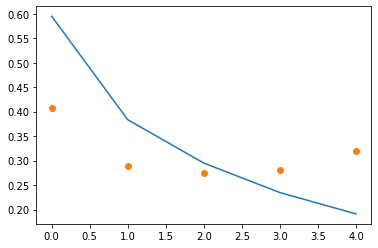

In [27]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [28]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 0s 591us/step - loss: 0.3456 - acc: 0.8730


### IMDB Classification using simple RNN

In [87]:
from keras.preprocessing import sequence

max_words=10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [98]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16))
rnn.add(layers.SimpleRNN(16,return_sequences='True'))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [99]:
rnn.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 16)          528       
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 161,073
Trainable params: 161,073
Non-trainable params: 0
_______________________________________________

In [100]:
history=rnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2) 

Epoch 1/5
157/157 [==============================] - 4s 26ms/step - loss: 0.5192 - acc: 0.7387 - val_loss: 0.4607 - val_acc: 0.7846
Epoch 2/5
157/157 [==============================] - 4s 25ms/step - loss: 0.3471 - acc: 0.8613 - val_loss: 0.4033 - val_acc: 0.8302
Epoch 3/5
157/157 [==============================] - 4s 25ms/step - loss: 0.2678 - acc: 0.9000 - val_loss: 0.6649 - val_acc: 0.7594
Epoch 4/5
157/157 [==============================] - 4s 25ms/step - loss: 0.2144 - acc: 0.9241 - val_loss: 0.4173 - val_acc: 0.8362
Epoch 5/5
157/157 [==============================] - 4s 25ms/step - loss: 0.1614 - acc: 0.9469 - val_loss: 0.4679 - val_acc: 0.8220


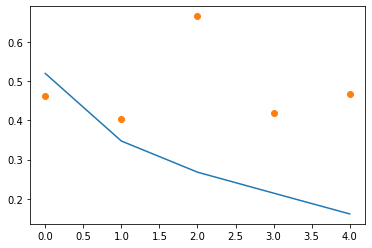

In [101]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

### IMDB Classification using simple LSTM
